In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
plt.rcParams['mathtext.fontset'] = 'stix'

# Full 200$ns$ Aib9 trajectory at 500K

Load trajectory

In [3]:
input_x = np.load('./DATA/Train/Aib9/sum_phi_200ns.npy')

Free energy profile

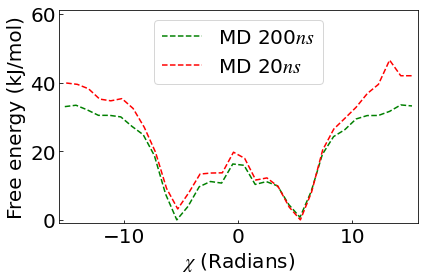

In [4]:
# data
T = 500 # unit: K
beta = 1000/(T*8.28) # kT=(8.28/1000)*T (kJ/mol/K)

hist_200ns = np.histogram(input_x, bins=32)
prob_200ns = hist_200ns[0].T/np.sum(hist_200ns[0].T)
freeE_200ns = (-1/beta)*np.log(prob_200ns-1e-11)
mids_200ns = 0.5*(hist_200ns[1][1:]+hist_200ns[1][:-1])

hist_20ns = np.histogram(input_x[:400000], bins=32)
prob_20ns = hist_20ns[0].T/np.sum(hist_20ns[0].T)
freeE_20ns = (-1/beta)*np.log(prob_20ns-1e-11)
mids_20ns = 0.5*(hist_20ns[1][1:]+hist_20ns[1][:-1])

# plotting
fig, ax=plt.subplots(figsize=(6,4), nrows=1, ncols=1)

ax.plot(mids_200ns, freeE_200ns-np.min(freeE_200ns), linestyle='--', color='green', label='MD 200$ns$')
ax.plot(mids_20ns, freeE_20ns-np.min(freeE_20ns), linestyle='--', color='red', label='MD 20$ns$')

ax.tick_params(axis='both', which='both', labelsize=20, direction='in')
ax.set_xlabel('$\chi$ (Radians)', size=20)
ax.set_ylabel('Free energy (kJ/mol)', size=20)
ax.set_xlim(-np.pi*5, np.pi*5)
ax.set_ylim(-1, 61)
ax.legend(loc='upper center', fontsize=20)

fig.tight_layout()

plt.show()

Spatially discretized into 32 labels

In [5]:
bins=np.arange(-15., 17, 1)
num_bins=len(bins)
idx_sum_phi=np.digitize(input_x, bins)

Symmetry parameter $\kappa$ of the 20$ns$ trajectory

In [6]:
N0=len(np.where(idx_sum_phi[:400000]<=15)[0])
N1=len(np.where(idx_sum_phi[:400000]>=16)[0])

kappa=N0/N1

kappa

0.4784424608674761

Symmetry parameter $\kappa$ of the full 200$ns$ trajectory

In [7]:
N0=len(np.where(idx_sum_phi<=15)[0])
N1=len(np.where(idx_sum_phi>=16)[0])

kappa=N0/N1

kappa

1.148993438587424